In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('BloodTraining.csv')

In [37]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


# Data Exploration

In [38]:
df.columns = ['User','MonthsSinceLast','NumDonations', 'TotalVolume', 'MonthsSinceFirst','DonationInMarch']

In [39]:
df.head()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


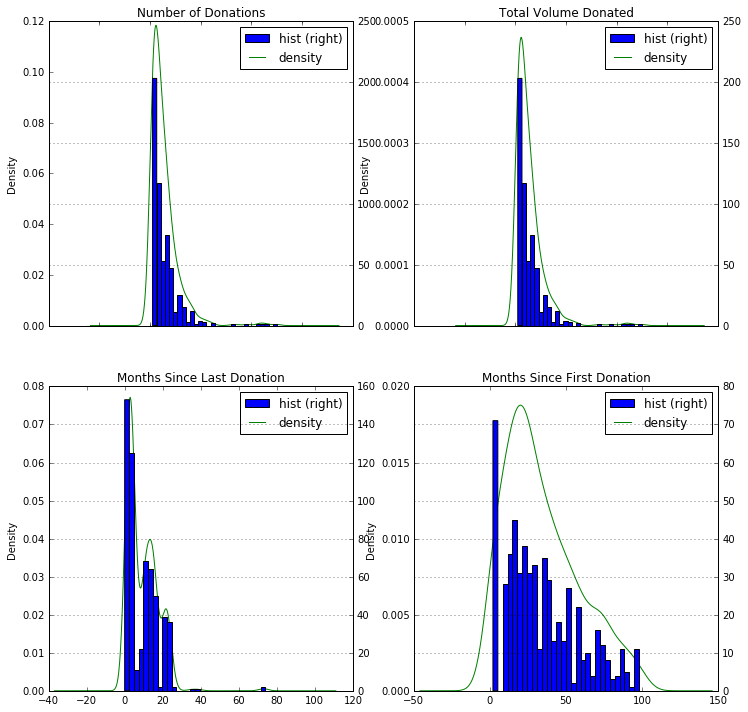

In [40]:
# Density Plots

fig, ax = plt.subplots(2,2, figsize=(12,12))

#Density/Histogram for Number of Donations
plt.subplot(221)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.NumDonations.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.NumDonations.plot(kind='density', label="density", legend=True)
plt.title('Number of Donations')
plt.grid()

#Density/Histogram for Total Volume Donated

plt.subplot(222)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.TotalVolume.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.TotalVolume.plot(kind='density', label="density", legend=True)
plt.title('Total Volume Donated')
plt.grid()

#Density/Histogram for Months Since Last Donation

plt.subplot(223)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df['MonthsSinceLast'].plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df['MonthsSinceLast'].plot(kind='density', label="density", legend=True)
plt.title('Months Since Last Donation')
plt.grid()

#Density/Histogram for Months Since First Donation

plt.subplot(224)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.MonthsSinceFirst.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.MonthsSinceFirst.plot(kind='density', label="density", legend=True)
plt.title('Months Since First Donation')
plt.grid()


In [41]:
df.corr()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch
User,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
MonthsSinceLast,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
NumDonations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
TotalVolume,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
MonthsSinceFirst,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
DonationInMarch,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


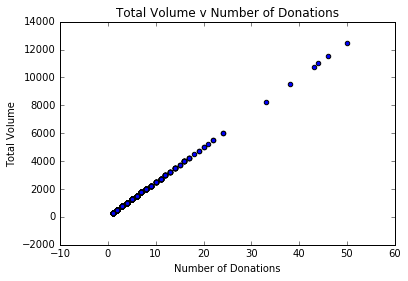

In [42]:
fig = plt.figure()

plt.scatter(df.NumDonations, df.TotalVolume)

# plt.grid()
ax = plt.gca()

ax.set_axis_bgcolor('white')
plt.xlabel('Number of Donations')
plt.ylabel('Total Volume')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.title('Total Volume v Number of Donations')

plt.show()


In [43]:
DonationPer = df.TotalVolume/df.NumDonations
df['DonationPer'] = DonationPer

In [44]:
df.head()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch,DonationPer
0,619,2,50,12500,98,1,250.0
1,664,0,13,3250,28,1,250.0
2,441,1,16,4000,35,1,250.0
3,160,2,20,5000,45,1,250.0
4,358,1,24,6000,77,0,250.0


In [45]:
df.DonationPer.describe()

count    576.0
mean     250.0
std        0.0
min      250.0
25%      250.0
50%      250.0
75%      250.0
max      250.0
Name: DonationPer, dtype: float64

In [46]:
del df['DonationPer']

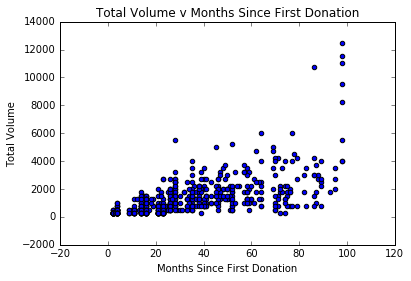

In [47]:
fig = plt.figure()

plt.scatter(df.MonthsSinceFirst, df.TotalVolume)

# plt.grid()
ax = plt.gca()

ax.set_axis_bgcolor('white')
plt.xlabel('Months Since First Donation')
plt.ylabel('Total Volume')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.title('Total Volume v Months Since First Donation')
plt.show()

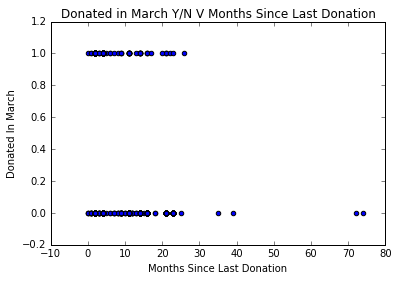

In [48]:
fig = plt.figure()

plt.scatter(df.MonthsSinceLast, df.DonationInMarch)

# plt.grid()
ax = plt.gca()

ax.set_axis_bgcolor('white')
plt.xlabel('Months Since Last Donation')
plt.ylabel('Donated In March')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.title('Donated in March Y/N V Months Since Last Donation')

plt.show()

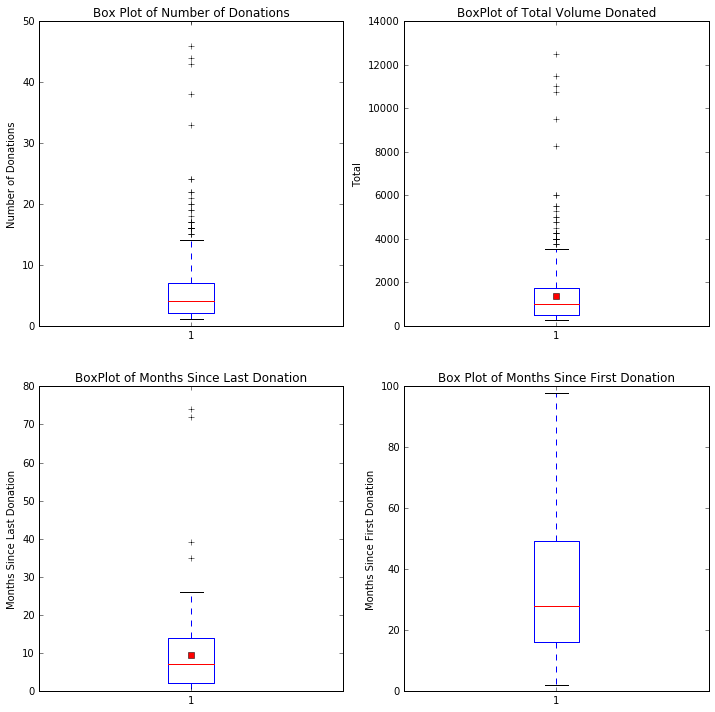

In [49]:
# Box Plots

fig, ax = plt.subplots(2,2, figsize=(12,12))

#Box Plot for Number of Donations
plt.subplot(223)

plt.boxplot(df.MonthsSinceLast, showmeans=True)
plt.ylabel('Months Since Last Donation')
plt.title('BoxPlot of Months Since Last Donation')


#Density/Histogram for Total Volume Donated

plt.subplot(222)
plt.boxplot(df.TotalVolume, showmeans=True)
plt.ylabel('Total')
plt.title('BoxPlot of Total Volume Donated')

#Density/Histogram for Months Since Last Donation

plt.subplot(221)
plt.boxplot(df.NumDonations)
plt.ylabel('Number of Donations')
plt.title('Box Plot of Number of Donations')


#Density/Histogram for Months Since First Donation

plt.subplot(224)
plt.boxplot(df.MonthsSinceFirst)
plt.ylabel('Months Since First Donation')
plt.title('Box Plot of Months Since First Donation')

In [50]:
df.corr()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch
User,1.000000,-0.023217,0.063148,0.063148,0.098370,0.041925
MonthsSinceLast,-0.023217,1.000000,-0.159731,-0.159731,0.186899,-0.261234
NumDonations,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
TotalVolume,0.063148,-0.159731,1.000000,1.000000,0.622116,0.220615
MonthsSinceFirst,0.098370,0.186899,0.622116,0.622116,1.000000,-0.019819
DonationInMarch,0.041925,-0.261234,0.220615,0.220615,-0.019819,1.000000


Regarding the Correlation Matrix:
 - Total Volume and Number of Donations are directly correlated, which means that users donate the same amount of blood per donation
 - It appears the longer it has been since a user has donated, the less likely they donated in March
 - Users appear to come back to donate, the longer it has been since they first donated, the more blood they have donated

# Data Munging

In [51]:
df.describe()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


No Blank Values:

In [52]:
print(df[df.User.isnull()].shape)
print(df[df.MonthsSinceLast.isnull()].shape)
print(df[df.NumDonations.isnull()].shape)
print(df[df.TotalVolume.isnull()].shape)
print(df[df.MonthsSinceFirst.isnull()].shape)
print(df[df.DonationInMarch.isnull()].shape)

(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)
(0, 6)


Not sure if I want to Eliminate the outliers for Total Volume/ Number of Donations, per the scatter plots it seems like outliers may be the explanation for the amount of blood donated.

In [53]:
df1=pd.read_csv('BloodTest.csv')

In [54]:
df1.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [55]:
df1.columns = ['User','MonthsSinceLast','NumDonations', 'TotalVolume', 'MonthsSinceFirst',]

In [56]:
df1.head()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


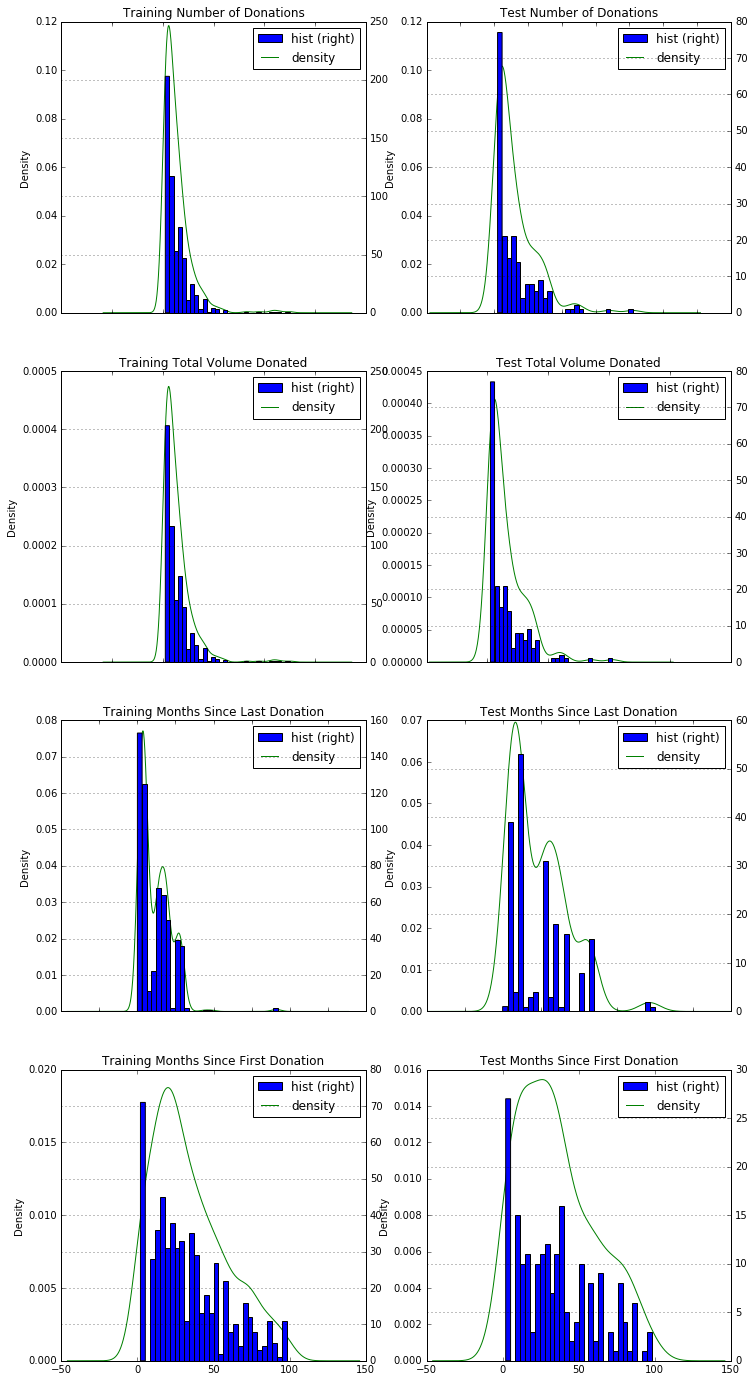

In [57]:
# Density Plots

fig, ax = plt.subplots(4,2, figsize=(12,24))

#Density/Histogram for Number of Donations
plt.subplot(421)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.NumDonations.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.NumDonations.plot(kind='density', label="density", legend=True)
plt.title('Training Number of Donations')
plt.grid()

plt.subplot(422)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df1.NumDonations.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df1.NumDonations.plot(kind='density', label="density", legend=True)
plt.title('Test Number of Donations')
plt.grid()



#Density/Histogram for Total Volume Donated

plt.subplot(423)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.TotalVolume.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.TotalVolume.plot(kind='density', label="density", legend=True)
plt.title('Training Total Volume Donated')
plt.grid()

plt.subplot(424)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df1.TotalVolume.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df1.TotalVolume.plot(kind='density', label="density", legend=True)
plt.title('Test Total Volume Donated')
plt.grid()

#Density/Histogram for Months Since Last Donation

plt.subplot(425)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df['MonthsSinceLast'].plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df['MonthsSinceLast'].plot(kind='density', label="density", legend=True)
plt.title('Training Months Since Last Donation')
plt.grid()

plt.subplot(426)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df1['MonthsSinceLast'].plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df1['MonthsSinceLast'].plot(kind='density', label="density", legend=True)
plt.title('Test Months Since Last Donation')
plt.grid()

#Density/Histogram for Months Since First Donation

plt.subplot(427)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df.MonthsSinceFirst.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df.MonthsSinceFirst.plot(kind='density', label="density", legend=True)
plt.title('Training Months Since First Donation')
plt.grid()

plt.subplot(428)
ax = plt.gca()
ax.set_axis_bgcolor('white')
df1.MonthsSinceFirst.plot(kind='hist', secondary_y=True, label="hist", legend=True, bins = 30)
df1.MonthsSinceFirst.plot(kind='density', label="density", legend=True)
plt.title('Test Months Since First Donation')
plt.grid()


Data does not appear to be normally distributed for all four data sets.
 - Number of Donations is aggressively positively skewed (>1), and is extremely leptokurtic (much greater than 3)
 - Total Volume Donated is aggressively positively skewed (>1), and is extremely leptokurtic (much greater than 3)
 - Months Since Last Donation is aggressively postively skewed (>1), and is extremely leptokurtic (much greater than 3)
 - Monthis Since First donation shows some skew (between .5 and 1) but is actually extremely platykurtic (much less than 3)

In [58]:
print ("Skew of Number of Donations:", df.NumDonations.skew())
print ("Kurtosis of Number of Donations", df.NumDonations.kurtosis())
print ("Skew of Total Volume Donated:", df.TotalVolume.skew())
print ("Kurtosis of Total Volume Donated", df.TotalVolume.kurtosis())
print ("Skew of Months Since Last Donation:", df.MonthsSinceLast.skew())
print ("Kurtosis of Months Since Last Donation", df.MonthsSinceLast.kurtosis())
print ("Skew of Months Since First Donation:", df.MonthsSinceFirst.skew())
print ("Kurtosis of Months Since First Donation", df.MonthsSinceFirst.kurtosis())


Skew of Number of Donations: 3.50333127957
Kurtosis of Number of Donations 18.9404927852
Skew of Total Volume Donated: 3.50333127957
Kurtosis of Total Volume Donated 18.9404927852
Skew of Months Since Last Donation: 2.07110709716
Kurtosis of Months Since Last Donation 11.4166867416
Skew of Months Since First Donation: 0.76770642125
Kurtosis of Months Since First Donation -0.192772230792


In [66]:
df['LogofNumDonations'] = np.log(df.NumDonations)

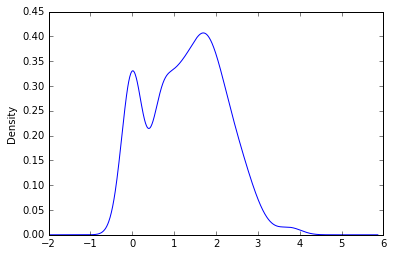

In [68]:
df.LogofNumDonations.plot(kind='density')

In [59]:
# QQ Plot

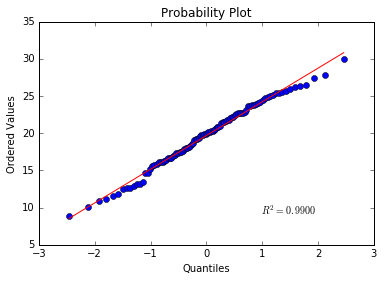

In [60]:
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

# Linear Modeling

In [61]:
df.head()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [80]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='DonationInMarch ~ MonthsSinceLast + NumDonations + TotalVolume + MonthsSinceFirst', data=df).fit()
print(lm.summary())
intercept = lm.params[0]
bsub1 = lm.params[1]
bsub2 = lm.params[2]
bsub3 = lm.params[3]
bsub4 = lm.params[4]
print("")
print("Intercept: %s "% intercept)
print("Coefficient of Months Since Last: %s "% bsub1)
print("Coefficient of Number of Donations: %s "% bsub2)
print("Coefficient of Total Volume: %s " % bsub3)
print("Coefficient of Months Since First: %s "% bsub4)

                            OLS Regression Results                            
Dep. Variable:        DonationInMarch   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.17
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           2.61e-15
Time:                        20:59:04   Log-Likelihood:                -291.20
No. Observations:                 576   AIC:                             590.4
Df Residuals:                     572   BIC:                             607.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.3116      0.034  

In [81]:
import statsmodels.formula.api as smf

lm2 = smf.ols(formula='DonationInMarch ~ MonthsSinceLast + NumDonations + MonthsSinceFirst', data=df).fit()
print(lm2.summary())
intercept = lm2.params[0]
bsub1 = lm2.params[1]
bsub2 = lm2.params[2]
bsub3 = lm2.params[3]
print("")
print("Intercept: %s "% intercept)
print("Coefficient of Months Since Last: %s "% bsub1)
print("Coefficient of Number of Donations: %s "% bsub2)
print("Coefficient of Months Since First: %s " % bsub3)

                            OLS Regression Results                            
Dep. Variable:        DonationInMarch   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     25.17
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           2.61e-15
Time:                        20:59:26   Log-Likelihood:                -291.20
No. Observations:                 576   AIC:                             590.4
Df Residuals:                     572   BIC:                             607.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.3116      0.034  

In [70]:
df['LogofTotalVolume'] = np.log(df.TotalVolume)
df['LogofMonthsSinceLast'] = np.log(df.MonthsSinceLast)
df['LogofMonthsSinceFirst'] = np.log(df.MonthsSinceFirst)

In [72]:
df.head()

,User,MonthsSinceLast,NumDonations,TotalVolume,MonthsSinceFirst,DonationInMarch,LogofNumDonations,LogofTotalVolume,LogofMonthsSinceLast,LogofMonthsSinceFirst
0,619,2,50,12500,98,1,3.912023,9.433484,0.693147,4.584967
1,664,0,13,3250,28,1,2.564949,8.086410,-inf,3.332205
2,441,1,16,4000,35,1,2.772589,8.294050,0.000000,3.555348
3,160,2,20,5000,45,1,2.995732,8.517193,0.693147,3.806662
4,358,1,24,6000,77,0,3.178054,8.699515,0.000000,4.343805


In [82]:
lm3 = smf.ols(formula='DonationInMarch ~ LogofNumDonations + LogofMonthsSinceFirst', data=df).fit()
print(lm3.summary())
intercept = lm3.params[0]
bsub1 = lm3.params[1]
bsub2 = lm3.params[2]
print("")
print("Intercept: %s "% intercept)
print("Coefficient of Log of Number of Donations: %s "% bsub1)
print("Coefficient of Log of Months Since First: %s " % bsub2)

                            OLS Regression Results                            
Dep. Variable:        DonationInMarch   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     35.43
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           3.12e-15
Time:                        20:59:48   Log-Likelihood:                -293.34
No. Observations:                 576   AIC:                             592.7
Df Residuals:                     573   BIC:                             605.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.39